In [1]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create

# Read in the data

df = pd.read_csv(r'/Users/deborah/Desktop/Greatness/Data/movies.csv')

In [2]:
# Look at data

df.head()

,name,rating,genre,year,released,released country,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,United States,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,United States,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,United States,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,1980-07-02,United States,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,1980-07-25,United States,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Find null values

df.isnull().sum()

name                   0
rating                77
genre                  0
year                   0
released               2
released country       2
score                  3
votes                  3
director               0
writer                 3
star                   1
country                3
budget              2171
gross                189
company               17
runtime                4
dtype: int64

In [4]:
# Remove null values

df.dropna(inplace = True)
df.isnull().sum()

name                0
rating              0
genre               0
year                0
released            0
released country    0
score               0
votes               0
director            0
writer              0
star                0
country             0
budget              0
gross               0
company             0
runtime             0
dtype: int64

In [5]:
# Data types

df.dtypes

name                 object
rating               object
genre                object
year                  int64
released             object
released country     object
score               float64
votes               float64
director             object
writer               object
star                 object
country              object
budget              float64
gross               float64
company              object
runtime             float64
dtype: object

In [6]:
# Change data type of columns

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df.dtypes

name                 object
rating               object
genre                object
year                  int64
released             object
released country     object
score               float64
votes               float64
director             object
writer               object
star                 object
country              object
budget                int64
gross                 int64
company              object
runtime             float64
dtype: object

In [7]:
# Create correct year column

df['yearcorrect'] = df['released'].astype(str).str[:4]

df.head()

,name,rating,genre,year,released,released country,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,1980-06-13,United States,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,United States,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,United States,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,1980-07-02,United States,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,1980-07-25,United States,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [8]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [9]:
pd.set_option('display.max_row', None)

In [13]:
# Drop duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

df.head()

,name,rating,genre,year,released,released country,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,2009-12-18,United States,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,United States,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,1997-12-19,United States,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,United States,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,United States,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


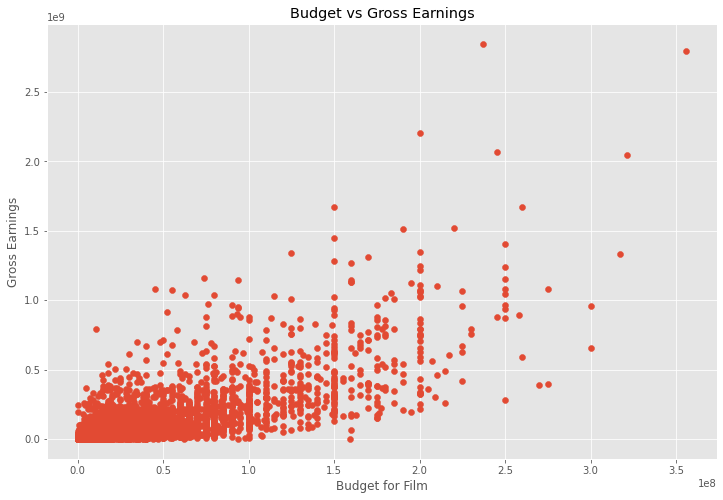

In [14]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget for Film')

plt.ylabel('Gross Earnings')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

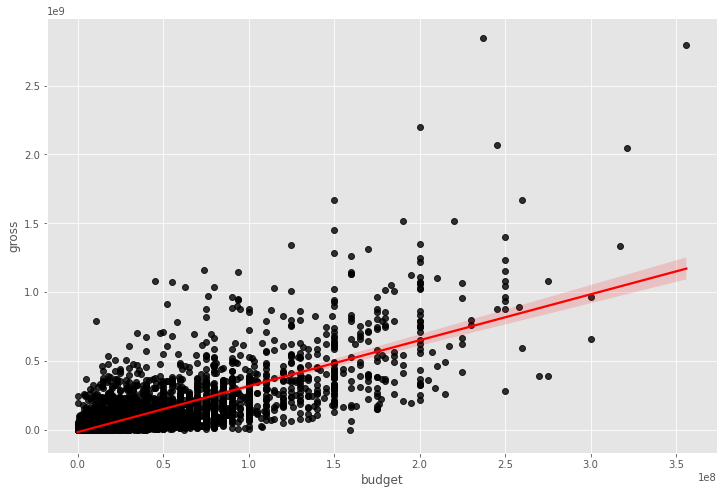

In [15]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "black"}, line_kws={"color":"red"})

In [16]:
#Correlation between budget & gross

df.corr(method='pearson') #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


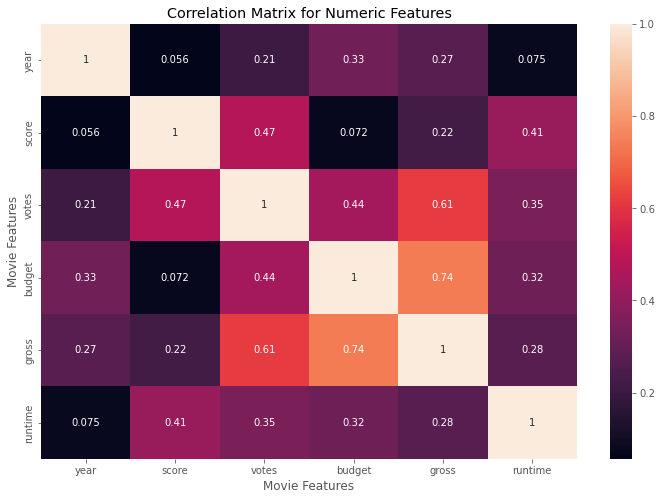

In [17]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [18]:
# Give categories a numeric value

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
            df_numerized[col_name] = df_numerized[col_name].astype('category')
            df_numerized[col_name] = df_numerized[col_name].cat.codes
            
df_numerized.head

<bound method NDFrame.head of       name  rating  genre  year  released  released country  score      votes  \
5445   386       5      0  2009      1705                47    7.8  1100000.0   
7445   388       5      0  2019      2340                47    8.4   903000.0   
3045  4909       5      6  1997       938                47    7.8  1100000.0   
6663  3643       5      0  2015      2130                47    7.8   876000.0   
7244   389       5      0  2018      2273                47    8.4   897000.0   
7480  4388       4      2  2019      2354                47    6.9   222000.0   
6653  2117       5      0  2015      2095                47    7.0   593000.0   
6043  3878       5      0  2012      1870                47    8.0  1300000.0   
6646  1541       5      0  2015      2083                47    7.1   370000.0   
7494  1530       4      2  2019      2374                47    6.8   148000.0   
6644   387       5      0  2015      2088                47    7.3   777000.0  

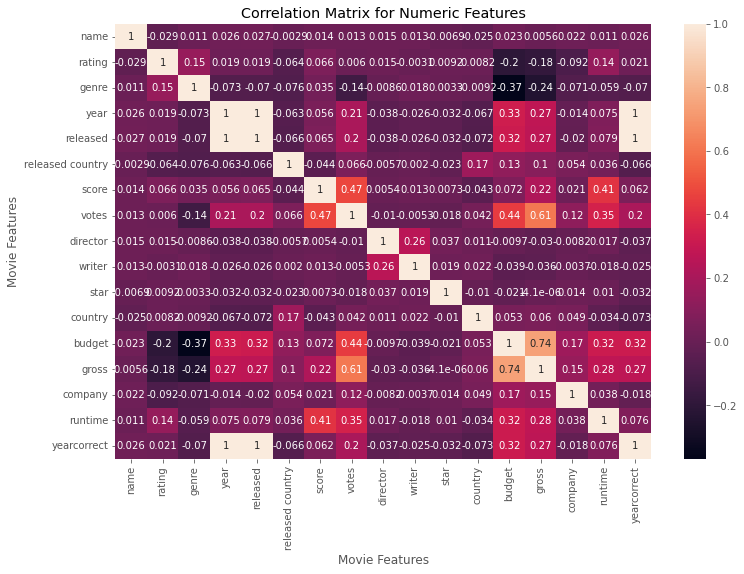

In [19]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [20]:
# See high correlation faster

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name              name                1.000000
                  rating             -0.029234
                  genre               0.010996
                  year                0.025542
                  released            0.027290
                  released country   -0.002908
                  score               0.014450
                  votes               0.012615
                  director            0.015246
                  writer              0.012880
                  star               -0.006882
                  country            -0.025490
                  budget              0.023392
                  gross               0.005639
                  company             0.021697
                  runtime             0.010850
                  yearcorrect         0.025764
rating            name               -0.029234
                  rating              1.000000
                  genre               0.147796
                  year                0.019499
             

In [21]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget            genre              -0.368523
genre             budget             -0.368523
gross             genre              -0.244101
genre             gross              -0.244101
rating            budget             -0.203946
budget            rating             -0.203946
rating            gross              -0.181906
gross             rating             -0.181906
genre             votes              -0.135990
votes             genre              -0.135990
company           rating             -0.092357
rating            company            -0.092357
released country  genre              -0.075552
genre             released country   -0.075552
country           yearcorrect        -0.073221
yearcorrect       country            -0.073221
genre             year               -0.073167
year              genre              -0.073167
country           released           -0.072089
released          country            -0.072089
genre             company            -0.071334
company      

In [22]:
# Votes and budget has the highest correlation to gross earnings

high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes             gross               0.614751
gross             votes               0.614751
budget            gross               0.740247
gross             budget              0.740247
year              released            0.997319
released          year                0.997319
year              yearcorrect         0.998210
yearcorrect       year                0.998210
released          yearcorrect         0.998464
yearcorrect       released            0.998464
name              name                1.000000
director          director            1.000000
company           company             1.000000
gross             gross               1.000000
budget            budget              1.000000
country           country             1.000000
star              star                1.000000
writer            writer              1.000000
votes             votes               1.000000
score             score               1.000000
released country  released country    1.000000
released     